In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv

# reading the file
data1 = pd.read_csv("D:/Crime_Prediction/data.csv") 


In [3]:
data = data1

In [4]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


__Data Preparation, Preprocessing and Exploration__

In [5]:

print(data.isnull().sum())

data.dropna(inplace=True)


IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64


In [6]:

crime_distribution_by_day = data['DayOfWeek'].value_counts()

print("\nDistribution of Crimes Over Days of the Week:")
print(crime_distribution_by_day)



Distribution of Crimes Over Days of the Week:
DayOfWeek
Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20204
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data['Date'] = pd.to_datetime(data['Date'])


data['Time'] = data['Time'].astype(str)
data['Hour'] = data['Time'].str[:2].astype(int)

__Statictical Detail of Crimes__

Category
LARCENY/THEFT                  40408
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                 

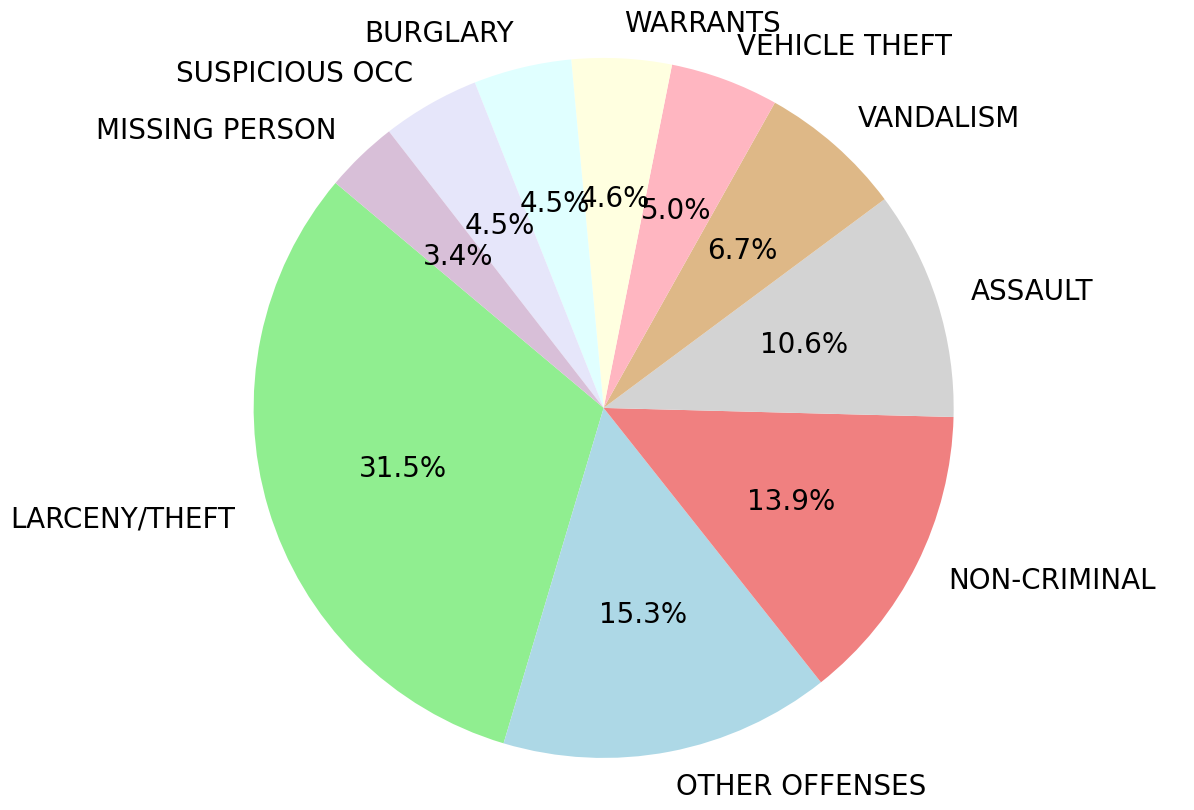

In [8]:
crime_frequency_by_category = data['Category'].value_counts()
print(crime_frequency_by_category)

top_n = 10
top_crime_frequency_by_category = crime_frequency_by_category.head(top_n)


colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightgray', 'burlywood', 'lightpink', 'lightyellow', 'lightcyan', 'lavender', 'thistle']

plt.figure(figsize=(15, 10))
plt.pie(top_crime_frequency_by_category, 
        labels=top_crime_frequency_by_category.index, 
        colors=colors[:top_n], 
        autopct='%1.1f%%', 
        startangle=140, 
        textprops={'fontsize': 20})  
plt.axis('equal')  


plt.show()

DayOfWeek
0    20783
1    21242
2    21332
3    21395
4    23371
5    22172
6    20204
Name: count, dtype: int64

Explanation:


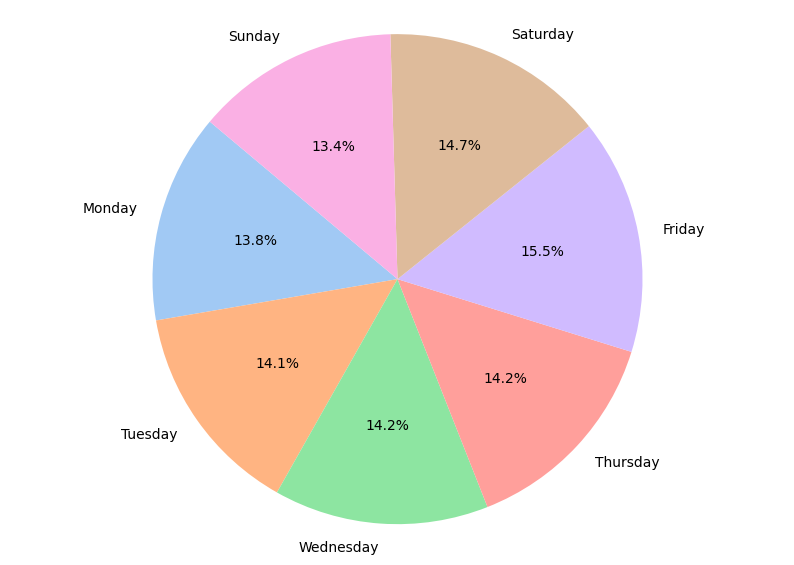

In [9]:
date_format = '%m/%d/%Y %I:%M:%S %p'
data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['DayOfWeek'] = data['Datetime'].dt.dayofweek


crime_distribution_by_day = data1['DayOfWeek'].value_counts().sort_index()

print(crime_distribution_by_day)
print("\nExplanation:")

day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
crime_distribution_by_day.index = crime_distribution_by_day.index.map(day_mapping)

plt.figure(figsize=(10, 7))
colors = sns.color_palette("pastel")[0:7]
plt.pie(crime_distribution_by_day, labels=crime_distribution_by_day.index, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  
plt.show()

Resolution
NONE                                      107779
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: count, dtype: int64


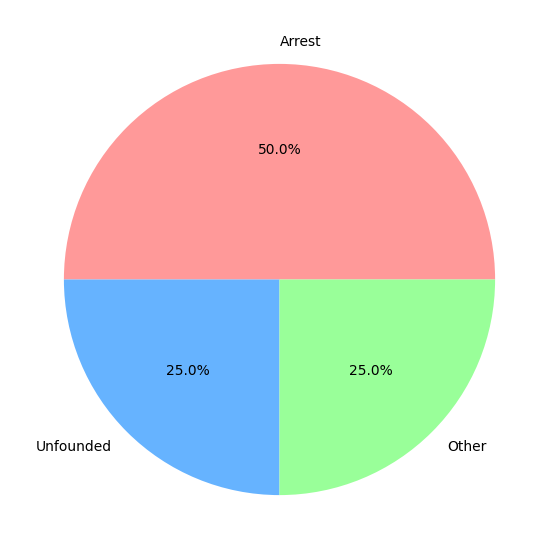

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

common_resolutions = data['Resolution'].value_counts()

print(common_resolutions)


data = pd.DataFrame({
    'Resolution': ['Arrest', 'Unfounded', 'Arrest', 'Other', 'Unfounded', 'Arrest', 'Other', 'Arrest']
})

common_resolutions = data['Resolution'].value_counts()


plt.figure(figsize=(10, 7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  
common_resolutions.plot(kind='pie', autopct='%1.1f%%', colors=colors)

plt.ylabel('')  
plt.show()



PdDistrict
SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: count, dtype: int64


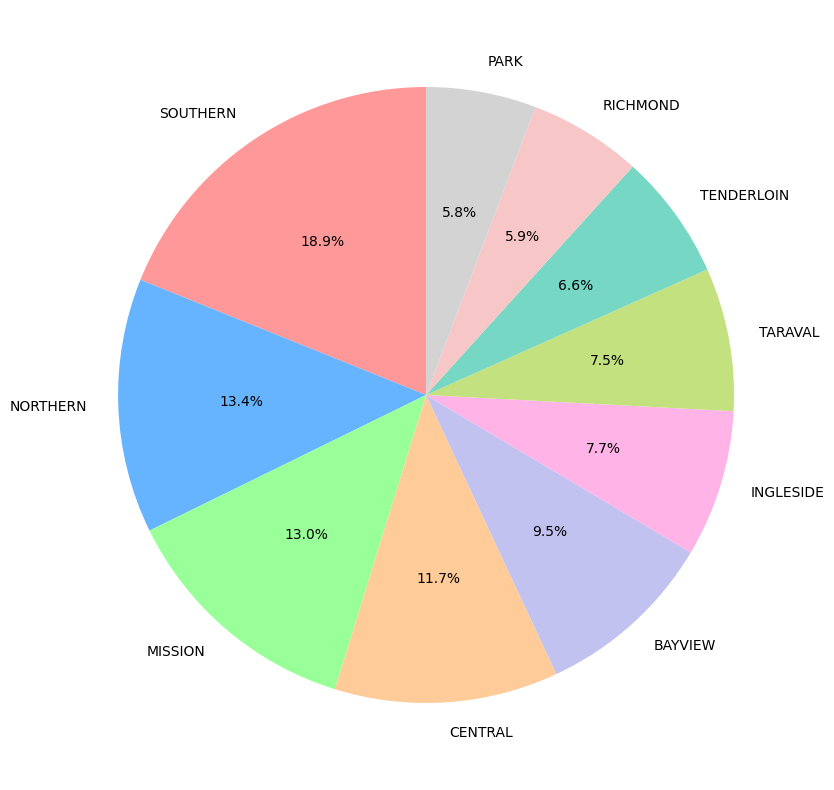

In [13]:


data = pd.read_csv("D:/Crime_Prediction/data.csv") 
crime_frequency_by_district = data['PdDistrict'].value_counts()




print(crime_frequency_by_district)


plt.figure(figsize=(12, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', 
          '#c4e17f', '#76d7c4', '#f7c6c7', '#d3d3d3', '#ffb347', '#87ceeb']  
crime_frequency_by_district.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)


plt.ylabel('')  
plt.tight_layout()
plt.show()


Monthly Trend of Incidents:
YearMonth
2016-01    12945
2016-02    12092
2016-03    12362
2016-04    12317
2016-05    12713
2016-06    12076
2016-07    12166
2016-08    12428
2016-09    12473
2016-10    13331
2016-11    12670
2016-12    12926
Freq: M, dtype: int64

Explanation:
The above data shows the trend of incidents over each month. This helps in identifying any seasonal patterns or trends over time.


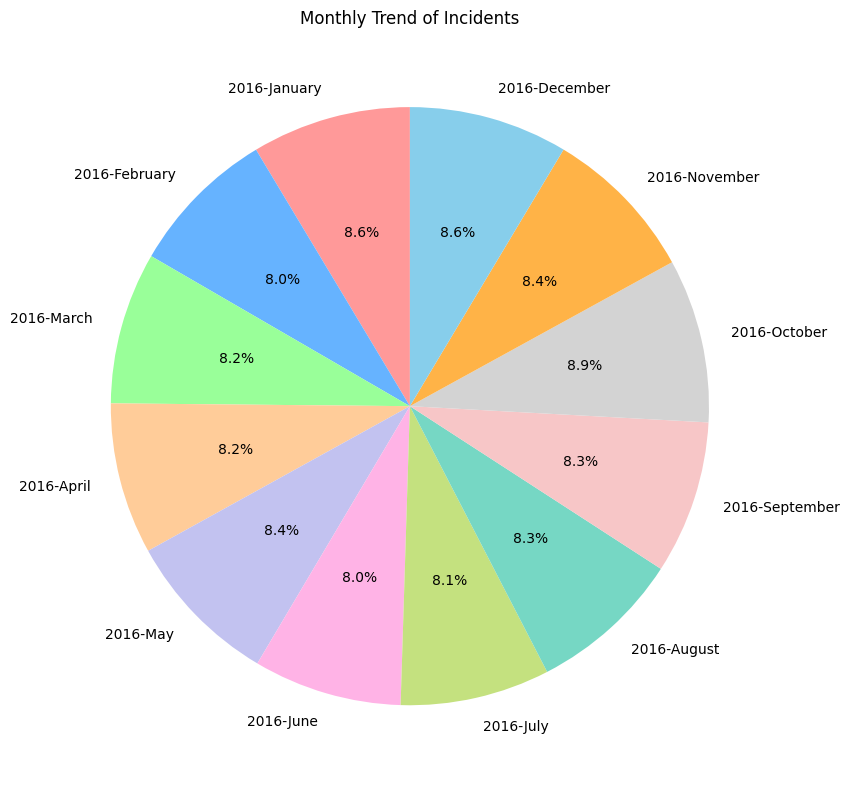

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



if data['Date'].dtype != 'datetime64[ns]':
    data['Date'] = pd.to_datetime(data['Date'])


data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_trend = data.groupby('YearMonth').size()
print("\nMonthly Trend of Incidents:")
print(monthly_trend)
print("\nExplanation:")
print("The above data shows the trend of incidents over each month. This helps in identifying any seasonal patterns or trends over time.")

monthly_trend_df = monthly_trend.reset_index(name='Incidents')
monthly_trend_df['YearMonth'] = monthly_trend_df['YearMonth'].astype(str)  
monthly_trend_df['YearMonth'] = pd.to_datetime(monthly_trend_df['YearMonth']).dt.strftime('%Y-%B')


colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#76d7c4','#f7c6c7','#d3d3d3',
          '#ffb347','#87ceeb','#ffcccb','#b0e0e6','#f4cccc','#d9ead3','#cfe2f3','#ead1dc','#fff2cc','#d9d2e9',
          '#fce5cd','#d0e0e3','#c9daf8','#e6b8af','#d5a6bd','#ffe599','#b6d7a8','#a2c4c9','#d9d9d9','#b4a7d6']


plt.figure(figsize=(12, 8))
plt.pie(monthly_trend_df['Incidents'], labels=monthly_trend_df['YearMonth'], autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Monthly Trend of Incidents')
plt.ylabel('')  
plt.tight_layout()
plt.show()


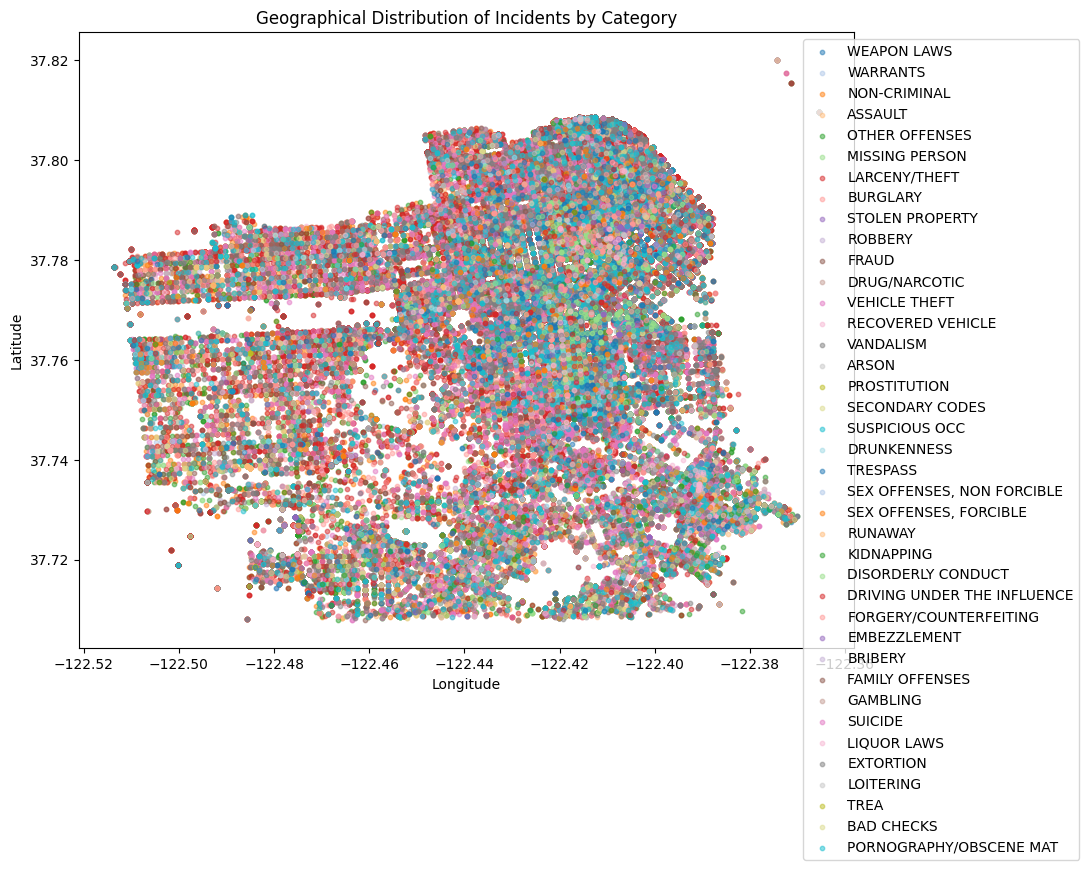

In [90]:

categories = data['Category'].unique()
colors = plt.cm.tab20.colors

plt.figure(figsize=(10, 8))
for i, category in enumerate(categories):
    subset = data[data['Category'] == category]
    plt.scatter(subset['X'], subset['Y'], alpha=0.5, s=10, label=category, color=colors[i % len(colors)])
plt.title('Geographical Distribution of Incidents by Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


__Features Grouping__  
In this below code we have created different set of featues. The set started from 2 features and ended with 5 features. The code will generate all possible combinations of features.

In [1]:
import pandas as pd
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn.linear_model._logistic")


# Features Engineering

In [2]:

data = pd.read_csv("D:/Crime_Prediction/data.csv") 


date_format = '%m/%d/%Y %I:%M:%S %p'

data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek


label_encoder = LabelEncoder()
data['PdDistrict'] = label_encoder.fit_transform(data['PdDistrict'])
data['Resolution'] = label_encoder.fit_transform(data['Resolution'])


data = data.drop(columns=['IncidntNum', 'Descript', 'Address', 'Location', 'PdId', 'Date', 'Time', 'Datetime'])


X = data.drop(columns=['Category'])
y = data['Category']


y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Evaluation Criteria

In [3]:

def print_metrics(y_test, y_pred, model_name):
    print(f"{model_name}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")


def generate_feature_sets(features, set_size):
    return list(itertools.combinations(features, set_size))


# Featurs Grouping Procedure  

In [4]:

features = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'PdDistrict', 'Resolution']


for set_size in range(2, len(features) + 1):
    feature_sets = generate_feature_sets(features, set_size)
    print(f"\n{set_size}-Feature Combinations:")
    for combination in feature_sets:
        print(combination)



2-Feature Combinations:
('Year', 'Month')
('Year', 'Day')
('Year', 'Hour')
('Year', 'Minute')
('Year', 'DayOfWeek')
('Year', 'PdDistrict')
('Year', 'Resolution')
('Month', 'Day')
('Month', 'Hour')
('Month', 'Minute')
('Month', 'DayOfWeek')
('Month', 'PdDistrict')
('Month', 'Resolution')
('Day', 'Hour')
('Day', 'Minute')
('Day', 'DayOfWeek')
('Day', 'PdDistrict')
('Day', 'Resolution')
('Hour', 'Minute')
('Hour', 'DayOfWeek')
('Hour', 'PdDistrict')
('Hour', 'Resolution')
('Minute', 'DayOfWeek')
('Minute', 'PdDistrict')
('Minute', 'Resolution')
('DayOfWeek', 'PdDistrict')
('DayOfWeek', 'Resolution')
('PdDistrict', 'Resolution')

3-Feature Combinations:
('Year', 'Month', 'Day')
('Year', 'Month', 'Hour')
('Year', 'Month', 'Minute')
('Year', 'Month', 'DayOfWeek')
('Year', 'Month', 'PdDistrict')
('Year', 'Month', 'Resolution')
('Year', 'Day', 'Hour')
('Year', 'Day', 'Minute')
('Year', 'Day', 'DayOfWeek')
('Year', 'Day', 'PdDistrict')
('Year', 'Day', 'Resolution')
('Year', 'Hour', 'Minute')
(

# Machine Learning Models for Crime Predictions

In [ ]:
import itertools
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.exceptions import ConvergenceWarning


data = pd.read_csv("D:/Crime_Prediction/data.csv")
date_format = '%m/%d/%Y %I:%M:%S %p'

data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek


label_encoder = LabelEncoder()
data['PdDistrict'] = label_encoder.fit_transform(data['PdDistrict'])
data['Resolution'] = label_encoder.fit_transform(data['Resolution'])

data = data.drop(columns=['IncidntNum', 'Descript', 'Address', 'Location', 'PdId', 'Date', 'Time', 'Datetime'])
data['Category'] = label_encoder.fit_transform(data['Category'])
target = 'Category'
features = data.columns.tolist()
features.remove(target)

def generate_feature_sets(features, set_size):
    return list(itertools.combinations(features, set_size))


warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn.linear_model._logistic")

def print_metrics(y_test, y_pred, model_name, feature_set):
    print(f"{model_name} with features {feature_set}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")


for set_size in range(2, len(features) + 1):
    feature_sets = generate_feature_sets(features, set_size)
    if feature_sets:
        feature_set = feature_sets[0]
        X = data[list(feature_set)]
        y = data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf_model = RandomForestClassifier()
        rf_model.fit(X_train, y_train)
        y_pred_rf = rf_model.predict(X_test)
        print_metrics(y_test, y_pred_rf, "Random Forest", feature_set)

        lr_model = LogisticRegression(max_iter=300)
        lr_model.fit(X_train, y_train)
        y_pred_lr = lr_model.predict(X_test)
        print_metrics(y_test, y_pred_lr, "Logistic Regression", feature_set)

        gb_model = GradientBoostingClassifier()
        gb_model.fit(X_train, y_train)
        y_pred_gb = gb_model.predict(X_test)
        print_metrics(y_test, y_pred_gb, "Gradient Boosting", feature_set)

        xgb_model = xgb.XGBClassifier()
        xgb_model.fit(X_train, y_train)
        y_pred_xgb = xgb_model.predict(X_test)
        print_metrics(y_test, y_pred_xgb, "XGBoost", feature_set)


Random Forest with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2670  
Precision: 0.1114  
Recall: 0.2670  
F1 Score: 0.1427  

Logistic Regression with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2668  
Precision: 0.0712  
Recall: 0.2668  
F1 Score: 0.1124  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2668  
Precision: 0.1094  
Recall: 0.2668  
F1 Score: 0.1396  

XGBoost with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2670  
Precision: 0.1114  
Recall: 0.2670  
F1 Score: 0.1427  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3391  
Precision: 0.2431  
Recall: 0.3391  
F1 Score: 0.2005  

Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3347  
Precision: 0.1307  
Recall: 0.3347  
F1 Score: 0.1875  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3399  
Precision: 0.2156  
Recall: 0.3399  
F1 Score: 0.2003  

XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3394  
Precision: 0.2410  
Recall: 0.3394  
F1 Score: 0.2009  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3029  
Precision: 0.2723  
Recall: 0.3029  
F1 Score: 0.2849  

Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3347  
Precision: 0.1307  
Recall: 0.3347  
F1 Score: 0.1875  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3242  
Precision: 0.2743  
Recall: 0.3242  
F1 Score: 0.2191  


XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3568  
Precision: 0.2562  
Recall: 0.3568  
F1 Score: 0.2507  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3219  
Precision: 0.2851  
Recall: 0.3219  
F1 Score: 0.2994  

Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3347  
Precision: 0.1307  
Recall: 0.3347  
F1 Score: 0.1875  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3396  
Precision: 0.2405  
Recall: 0.3396  
F1 Score: 0.2174  


XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3677  
Precision: 0.2900  
Recall: 0.3677  
F1 Score: 0.2774  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3200  
Precision: 0.2840  
Recall: 0.3200  
F1 Score: 0.2979  

Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  
  
Accuracy: 0.3343  
Precision: 0.1305  
Recall: 0.3343  
F1 Score: 0.1872  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3396  
Precision: 0.2404  
Recall: 0.3396  
F1 Score: 0.2174  


XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3677  
Precision: 0.2900  
Recall: 0.3677  
F1 Score: 0.2774  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3306  
Precision: 0.2919  
Recall: 0.3306  
F1 Score: 0.3055  


Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3349  
Precision: 0.1308  
Recall: 0.3349  
F1 Score: 0.1876  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3385  
Precision: 0.2406  
Recall: 0.3385  
F1 Score: 0.2200  


XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3676  
Precision: 0.2900  
Recall: 0.3676  
F1 Score: 0.2800  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.3381  
Precision: 0.2949  
Recall: 0.3381  
F1 Score: 0.3086  

Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.3346  
Precision: 0.1307  
Recall: 0.3346  
F1 Score: 0.1875  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  
   
Accuracy: 0.3081  
Precision: 0.2502  
Recall: 0.3081  
F1 Score: 0.2118  

XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.3656  
Precision: 0.2884  
Recall: 0.3656  
F1 Score: 0.2776  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3477  
Precision: 0.3029  
Recall: 0.3477  
F1 Score: 0.3162  

Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3348  
Precision: 0.1308  
Recall: 0.3348  
F1 Score: 0.1876  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3048  
Precision: 0.2162  
Recall: 0.3048  
F1 Score: 0.2141  

XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3656  
Precision: 0.2884  
Recall: 0.3656  
F1 Score: 0.2776  

Random Forest with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3438  
Precision: 0.2999  
Recall: 0.3438  
F1 Score: 0.3133  

Logistic Regression with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3345  
Precision: 0.1306  
Recall: 0.3345  
F1 Score: 0.1873  

Gradient Boosting with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3028  
Precision: 0.2560  
Recall: 0.3028  
F1 Score: 0.2085  

XGBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3656  
Precision: 0.2884  
Recall: 0.3656  
F1 Score: 0.2776  


# Some other ML methods

In [ ]:
import itertools
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.exceptions import ConvergenceWarning

data = pd.read_csv("D:/Crime_Prediction/data.csv")


date_format = '%m/%d/%Y %I:%M:%S %p'


data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek


label_encoder = LabelEncoder()
data['PdDistrict'] = label_encoder.fit_transform(data['PdDistrict'])
data['Resolution'] = label_encoder.fit_transform(data['Resolution'])

data = data.drop(columns=['IncidntNum', 'Descript', 'Address', 'Location', 'PdId', 'Date', 'Time', 'Datetime'])
data['Category'] = label_encoder.fit_transform(data['Category'])

target = 'Category'
features = data.columns.tolist()
features.remove(target)

def generate_feature_sets(features, set_size):
    return list(itertools.combinations(features, set_size))

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn.linear_model._logistic")


def print_metrics(y_test, y_pred, model_name, feature_set):
    print(f"{model_name} with features {feature_set}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")

for set_size in range(2, len(features) + 1):
    feature_sets = generate_feature_sets(features, set_size)
    if feature_sets:
        feature_set = feature_sets[0]
        X = data[list(feature_set)]
        y = data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        knn_model = KNeighborsClassifier()
        knn_model.fit(X_train, y_train)
        y_pred_knn = knn_model.predict(X_test)
        print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors", feature_set)

        nb_model = GaussianNB()
        nb_model.fit(X_train, y_train)
        y_pred_nb = nb_model.predict(X_test)
        print_metrics(y_test, y_pred_nb, "Naive Bayes", feature_set)


        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        y_pred_dt = dt_model.predict(X_test)
        print_metrics(y_test, y_pred_dt, "Decision Tree", feature_set)


        ab_model = AdaBoostClassifier()
        ab_model.fit(X_train, y_train)
        y_pred_ab = ab_model.predict(X_test)
        print_metrics(y_test, y_pred_ab, "AdaBoost", feature_set)


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.1754  
Precision: 0.1351  
Recall: 0.1754  
F1 Score: 0.1454  

Naive Bayes with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2651  
Precision: 0.0715  
Recall: 0.2651  
F1 Score: 0.1126  

Decision Tree with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2670  
Precision: 0.1114  
Recall: 0.2670  
F1 Score: 0.1427  


AdaBoost with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2582  
Precision: 0.0719  
Recall: 0.2582  
F1 Score: 0.1124  


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.2457  
Precision: 0.2035  
Recall: 0.2457  
F1 Score: 0.2044  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3374  
Precision: 0.1782  
Recall: 0.3374  
F1 Score: 0.1970  

Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3392  
Precision: 0.2546  
Recall: 0.3392  
F1 Score: 0.2007  


AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3232  
Precision: 0.1316  
Recall: 0.3232  
F1 Score: 0.1866  


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.2995  
Precision: 0.2521  
Recall: 0.2995  
F1 Score: 0.2643  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  
  
Accuracy: 0.3344  
Precision: 0.2107  
Recall: 0.3344  
F1 Score: 0.2052  

Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  
  
Accuracy: 0.3076  
Precision: 0.2778  
Recall: 0.3076  
F1 Score: 0.2872  


AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3319  
Precision: 0.1473  
Recall: 0.3319  
F1 Score: 0.1901  


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3037  
Precision: 0.2578  
Recall: 0.3037  
F1 Score: 0.2700  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3245  
Precision: 0.1909  
Recall: 0.3245  
F1 Score: 0.2080  

Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3099  
Precision: 0.2842  
Recall: 0.3099  
F1 Score: 0.2925  


AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3248  
Precision: 0.1498  
Recall: 0.3248  
F1 Score: 0.1882  


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3037  
Precision: 0.2578  
Recall: 0.3037  
F1 Score: 0.2700  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3245  
Precision: 0.1909  
Recall: 0.3245  
F1 Score: 0.2080  

Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3095  
Precision: 0.2835  
Recall: 0.3095  
F1 Score: 0.2920  


AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3248  
Precision: 0.1498  
Recall: 0.3248  
F1 Score: 0.1882  


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.2845  
Precision: 0.2380  
Recall: 0.2845  
F1 Score: 0.2495  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3250  
Precision: 0.1977  
Recall: 0.3250  
F1 Score: 0.2098  

Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.2906  
Precision: 0.2834  
Recall: 0.2906  
F1 Score: 0.2853  


AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3248  
Precision: 0.1498  
Recall: 0.3248  
F1 Score: 0.1882  


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.2740  
Precision: 0.2303  
Recall: 0.2740  
F1 Score: 0.2410  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  
  
Accuracy: 0.3242  
Precision: 0.1947  
Recall: 0.3242  
F1 Score: 0.2091  

Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.2846  
Precision: 0.2829  
Recall: 0.2846  
F1 Score: 0.2821  


AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.3263  
Precision: 0.1497  
Recall: 0.3263  
F1 Score: 0.1886  

K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.2740  
Precision: 0.2303  
Recall: 0.2740  
F1 Score: 0.2410  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3242  
Precision: 0.1947  
Recall: 0.3242  
F1 Score: 0.2091  
  
Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.2846  
Precision: 0.2827  
Recall: 0.2846  
F1 Score: 0.2820  


AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3263  
Precision: 0.1497  
Recall: 0.3263  
F1 Score: 0.1886  


K-Nearest Neighbors with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.2740  
Precision: 0.2303  
Recall: 0.2740  
F1 Score: 0.2410  

Naive Bayes with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3242  
Precision: 0.1947  
Recall: 0.3242  
F1 Score: 0.2091  

Decision Tree with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.2832  
Precision: 0.2815  
Recall: 0.2832  
F1 Score: 0.2806  

AdaBoost with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  
  
Accuracy: 0.3263  
Precision: 0.1497  
Recall: 0.3263  
F1 Score: 0.1886  


# Deep Learning Mehods for  Crime Predictions

In [17]:
import itertools
import warnings
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import ConvergenceWarning
from torch.utils.data import DataLoader, TensorDataset


data = pd.read_csv("D:/Crime_Prediction/data.csv")
date_format = '%m/%d/%Y %I:%M:%S %p'

data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek

label_encoder = LabelEncoder()
data['PdDistrict'] = label_encoder.fit_transform(data['PdDistrict'])
data['Resolution'] = label_encoder.fit_transform(data['Resolution'])

data = data.drop(columns=['IncidntNum', 'Descript', 'Address', 'Location', 'PdId', 'Date', 'Time', 'Datetime'])
data['Category'] = label_encoder.fit_transform(data['Category'])

target = 'Category'
features = data.columns.tolist()
features.remove(target)

def generate_feature_sets(features, set_size):
    return list(itertools.combinations(features, set_size))

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn.linear_model._logistic")

def print_metrics(y_test, y_pred, model_name, feature_set):
    print(f"{model_name} with features {feature_set}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")

class CrimePredictorNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CrimePredictorNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for set_size in range(2, len(features) + 1):
    feature_sets = generate_feature_sets(features, set_size)
    if feature_sets:
        feature_set = feature_sets[0]
        X = data[list(feature_set)].values
        y = data[target].values

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
        y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
        train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

        input_size = X_train.shape[1]
        hidden_size = 128
        output_size = len(np.unique(y))
        model = CrimePredictorNN(input_size, hidden_size, output_size).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        num_epochs = 20
        for epoch in range(num_epochs):
            model.train()
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
            
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        
        model.eval()
        with torch.no_grad():
            y_pred_list = []
            for batch_X, _ in test_loader:
                outputs = model(batch_X)
                _, predicted = torch.max(outputs.data, 1)
                y_pred_list.append(predicted.cpu().numpy())
        
        y_pred = np.concatenate(y_pred_list)
        print_metrics(y_test, y_pred, "Neural Network", feature_set)


Using device: cuda
Epoch [1/20], Loss: 2.6563
Epoch [2/20], Loss: 3.0240
Epoch [3/20], Loss: 2.6347
Epoch [4/20], Loss: 2.0516
Epoch [5/20], Loss: 2.0391
Epoch [6/20], Loss: 2.3542
Epoch [7/20], Loss: 1.8877
Epoch [8/20], Loss: 2.7712
Epoch [9/20], Loss: 2.9039
Epoch [10/20], Loss: 2.2003
Epoch [11/20], Loss: 2.3350
Epoch [12/20], Loss: 2.5396
Epoch [13/20], Loss: 2.4883
Epoch [14/20], Loss: 2.3099
Epoch [15/20], Loss: 2.4293
Epoch [16/20], Loss: 2.3620
Epoch [17/20], Loss: 2.5354
Epoch [18/20], Loss: 2.4878
Epoch [19/20], Loss: 2.9273
Epoch [20/20], Loss: 2.4599
Neural Network with features ('DayOfWeek', 'PdDistrict'):

Accuracy: 0.2665
Precision: 0.0930
Recall: 0.2665
F1 Score: 0.1290

Epoch [1/20], Loss: 2.5209
Epoch [2/20], Loss: 2.6116
Epoch [3/20], Loss: 2.2093
Epoch [4/20], Loss: 2.0336
Epoch [5/20], Loss: 2.0304
Epoch [6/20], Loss: 2.1568
Epoch [7/20], Loss: 2.3386
Epoch [8/20], Loss: 2.0753
Epoch [9/20], Loss: 2.0374
Epoch [10/20], Loss: 2.3573
Epoch [11/20], Loss: 2.1826
Epoc

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


import itertools
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
data = pd.read_csv("D:/Crime_Prediction/data.csv")
date_format = '%m/%d/%Y %I:%M:%S %p'

data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek

label_encoder = LabelEncoder()
data['PdDistrict'] = label_encoder.fit_transform(data['PdDistrict'])
data['Resolution'] = label_encoder.fit_transform(data['Resolution'])

data = data.drop(columns=['IncidntNum', 'Descript', 'Address', 'Location', 'PdId', 'Date', 'Time', 'Datetime'])
data['Category'] = label_encoder.fit_transform(data['Category'])
target = 'Category'
features = data.columns.tolist()
features.remove(target)

def generate_feature_sets(features, set_size):
    return list(itertools.combinations(features, set_size))

warnings.filterwarnings("ignore", category=FutureWarning, module="tensorflow")

def print_metrics(y_test, y_pred, model_name, feature_set):
    print(f"{model_name} with features {feature_set}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")


def create_mlp_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(data[target].unique())

for set_size in range(2, len(features) + 1):
    feature_sets = generate_feature_sets(features, set_size)
    if feature_sets:
        feature_set = feature_sets[0]
        X = data[list(feature_set)]
        y = data[target]
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        y = to_categorical(y, num_classes=num_classes)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = create_mlp_model(X_train.shape[1], num_classes)
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)
        y_pred_classes = y_pred.argmax(axis=-1)
        y_test_classes = y_test.argmax(axis=-1)
        print_metrics(y_test_classes, y_pred_classes, "MLP Neural Network", feature_set)


Num GPUs Available:  0  
Num GPUs Available:  0  

MLP Neural Network with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2684  
Precision: 0.0949  
Recall: 0.2684  
F1 Score: 0.1305  

MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3393  
Precision: 0.1784  
Recall: 0.3393  
F1 Score: 0.1971  


MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3392  
Precision: 0.1783  
Recall: 0.3392  
F1 Score: 0.1970  


MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3396  
Precision: 0.1963  
Recall: 0.3396  
F1 Score: 0.2001  


MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3397  
Precision: 0.1966  
Recall: 0.3397  
F1 Score: 0.1974  


MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3392  
Precision: 0.1784  
Recall: 0.3392  
F1 Score: 0.1970  


MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.3387  
Precision: 0.1941  
Recall: 0.3387  
F1 Score: 0.1969  


MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3384  
Precision: 0.1780  
Recall: 0.3384  
F1 Score: 0.1964  

MLP Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3385  
Precision: 0.1940  
Recall: 0.3385  
F1 Score: 0.1976  


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import itertools
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
data = pd.read_csv("D:/Crime_Prediction/data.csv")
date_format = '%m/%d/%Y %I:%M:%S %p'
data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek

label_encoder = LabelEncoder()
data['PdDistrict'] = label_encoder.fit_transform(data['PdDistrict'])
data['Resolution'] = label_encoder.fit_transform(data['Resolution'])

data = data.drop(columns=['IncidntNum', 'Descript', 'Address', 'Location', 'PdId', 'Date', 'Time', 'Datetime'])
data['Category'] = label_encoder.fit_transform(data['Category'])
target = 'Category'
features = data.columns.tolist()
features.remove(target)

def generate_feature_sets(features, set_size):
    return list(itertools.combinations(features, set_size))

warnings.filterwarnings("ignore", category=FutureWarning, module="tensorflow")

def print_metrics(y_test, y_pred, model_name, feature_set):
    print(f"{model_name} with features {feature_set}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")

def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(data[target].unique())

for set_size in range(2, len(features) + 1):
    feature_sets = generate_feature_sets(features, set_size)
    if feature_sets:
        feature_set = feature_sets[0]
        X = data[list(feature_set)]
        y = data[target]

        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        X = X.reshape((X.shape[0], 1, X.shape[1]))
        y = to_categorical(y, num_classes=num_classes)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = create_lstm_model((X_train.shape[1], X_train.shape[2]), num_classes)
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)
        y_pred_classes = y_pred.argmax(axis=-1)
        y_test_classes = y_test.argmax(axis=-1)
        print_metrics(y_test_classes, y_pred_classes, "LSTM Neural Network", feature_set)


Num GPUs Available:  0  
Num GPUs Available:  0  

LSTM Neural Network with features ('DayOfWeek', 'PdDistrict'):   

Accuracy: 0.2668  
Precision: 0.0712  
Recall: 0.2668  
F1 Score: 0.1124  


LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3392  
Precision: 0.1784  
Recall: 0.3392  
F1 Score: 0.1970  


LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3401  
Precision: 0.1787  
Recall: 0.3401  
F1 Score: 0.1974  


LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3411  
Precision: 0.1970  
Recall: 0.3411  
F1 Score: 0.1997  


LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3413  
Precision: 0.1971  
Recall: 0.3413  
F1 Score: 0.2029  


LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3411  
Precision: 0.1983  
Recall: 0.3411  
F1 Score: 0.2020  


LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.3414  
Precision: 0.2013  
Recall: 0.3414  
F1 Score: 0.2015  

LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3409  
Precision: 0.1966  
Recall: 0.3409  
F1 Score: 0.1995  


LSTM Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3419  
Precision: 0.1950  
Recall: 0.3419  
F1 Score: 0.2013  


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import itertools
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
data = pd.read_csv("D:/Crime_Prediction/data.csv")
date_format = '%m/%d/%Y %I:%M:%S %p'

data['Datetime'] = pd.to_datetime(data['Date'], format=date_format)
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['DayOfWeek'] = data['Datetime'].dt.dayofweek

label_encoder = LabelEncoder()
data['PdDistrict'] = label_encoder.fit_transform(data['PdDistrict'])
data['Resolution'] = label_encoder.fit_transform(data['Resolution'])


data = data.drop(columns=['IncidntNum', 'Descript', 'Address', 'Location', 'PdId', 'Date', 'Time', 'Datetime'])
data['Category'] = label_encoder.fit_transform(data['Category'])

target = 'Category'
features = data.columns.tolist()
features.remove(target)

def generate_feature_sets(features, set_size):
    return list(itertools.combinations(features, set_size))

warnings.filterwarnings("ignore", category=FutureWarning, module="tensorflow")

def print_metrics(y_test, y_pred, model_name, feature_set):
    print(f"{model_name} with features {feature_set}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")


def create_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(64, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(data[target].unique())

for set_size in range(2, len(features) + 1):
    feature_sets = generate_feature_sets(features, set_size)
    if feature_sets:
        feature_set = feature_sets[0]
        X = data[list(feature_set)]
        y = data[target]
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        X = X.reshape((X.shape[0], 1, X.shape[1]))
        y = to_categorical(y, num_classes=num_classes)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = create_rnn_model((X_train.shape[1], X_train.shape[2]), num_classes)
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)
        y_pred_classes = y_pred.argmax(axis=-1)
        y_test_classes = y_test.argmax(axis=-1)
        print_metrics(y_test_classes, y_pred_classes, "RNN Neural Network", feature_set)


Num GPUs Available:  0   
Num GPUs Available:  0  

RNN Neural Network with features ('DayOfWeek', 'PdDistrict'):  

Accuracy: 0.2668  
Precision: 0.0712  
Recall: 0.2668  
F1 Score: 0.1124  
 
RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution'):  

Accuracy: 0.3392  
Precision: 0.1784  
Recall: 0.3392  
F1 Score: 0.1970  


RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X'):  

Accuracy: 0.3390    
Precision: 0.1776    
Recall: 0.3390    
F1 Score: 0.1967    


RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'):  

Accuracy: 0.3391  
Precision: 0.1782  
Recall: 0.3391  
F1 Score: 0.1969  


RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year'):  

Accuracy: 0.3391  
Precision: 0.1783  
Recall: 0.3391  
F1 Score: 0.1970  

RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month'):  

Accuracy: 0.3391  
Precision: 0.1789  
Recall: 0.3391  
F1 Score: 0.1967  


RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day'):  

Accuracy: 0.3351  
Precision: 0.1309  
Recall: 0.3351  
F1 Score: 0.1878  


RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour'):  

Accuracy: 0.3351  
Precision: 0.1760  
Recall: 0.3351  
F1 Score: 0.1878  

RNN Neural Network with features ('DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Minute'):  

Accuracy: 0.3391  
Precision: 0.1783  
Recall: 0.3391  
F1 Score: 0.1969  
